##  <div align="center">Итоговомый проект по курсу "Библиотеки Python для Data Science"</dev>

In [545]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from math import ceil
from pylab import rcParams
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score as r2

%matplotlib inline
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 16, 8

pd.options.display.max_columns = 100

In [546]:
train_data = pd.read_csv('train.csv')

train_data.sample(10)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
3646   9231           1    3.0  88.217099         NaN            0.0     16   
7096    496          62    3.0  84.356980         NaN            0.0      9   
7691   1757           6    1.0  43.290147         NaN            0.0      4   
8554   8609         169    1.0  38.679141   38.092181            8.0      3   
9800   3868          12    1.0  40.608248   22.447326            8.0      5   
4495    216          62    3.0  87.003434   91.378545            1.0      3   
877    5186          31    3.0  62.921762   45.122735            6.0     10   
9343  13538          78    2.0  41.338369   23.266062            5.0      8   
1091  11026          18    1.0  38.181332   23.071819            8.0      6   
1449  16266           6    2.0  61.735728   62.898664            0.0     16   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
3646        17.0       1977   0.007122         B         B         1   
7096         0.0       1977   0.072158         B         B         2   
7691        17.0       1977   0.243205         B         B         5   
8554        17.0       1988   0.178917         B         B        18   
9800        17.0       1992   0.090799         B         B        74   
4495         1.0       2017   0.072158         B         B         2   
877          9.0       1977   0.151346         B         A        32   
9343        14.0       1974   0.219006         B         B        28   
1091        17.0       1999   0.000000         B         B        30   
1449        17.0       1977   0.243205         B         B         5   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
3646       264         0           NaN            0        1       B   
7096       629         1           NaN            0        0       A   
7691      1564         0         540.0            0        0       B   
8554      3594         4         192.0            1        5       B   
9800     19083         2           NaN            5       15       B   
4495       629         1           NaN            0        0       A   
877       5889        10         830.0            4        1       B   
9343      6746         3           NaN            1        4       B   
1091      5562         0           NaN            0        5       A   
1449      1564         0         540.0            0        0       B   

              Price  
3646  250572.554909  
7096  172344.612792  
7691  127778.625888  
8554  201570.409690  
9800  160082.475002  
4495  225785.867439  
877   264686.612297  
9343  182874.017574  
1091  192371.633485  
1449  168514.435296

### Описание датасета
* Id - идентификационный номер квартиры
* DistrictId - идентификационный номер района
* Rooms - количество комнат
* Square - площадь
* LifeSquare - жилая площадь
* KitchenSquare - площадь кухни
* Floor - этаж
* HouseFloor - количество этажей в доме
* HouseYear - год постройки дома
* Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
* Social_1, Social_2, Social_3 - социальные показатели местности
* Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
* Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
* Price - цена квартиры

In [547]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

## Exploratory data analysis

При изучении вещественных признаков необходимо ознакомиться с их основными статистиками используя функцию describe(). Исследуя ее показания можно понять где есть пропуски, с помощью count - если здесь не 10000, значит есть пропуски, по сравнению средней - mean с медианой - 50 персентилем можно судить о наличие выбросов при их существенных отличиях. Так же здесь стоит посмотреть на минимальные - максимальные значения, их сопоставления с другими статистиками даст представление о наличие некоректных значений в данных.

In [548]:
train_data.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.890500     56.315775    37.199645   
std     4859.01902     43.587592      0.839512     21.058732    86.241209   
min        0.00000      0.000000      0.000000      1.136859     0.370619   
25%     4169.50000     20.000000      1.000000     41.774881    22.769832   
50%     8394.50000     36.000000      2.000000     52.513310    32.781260   
75%    12592.50000     75.000000      2.000000     65.900625    45.128803   
max    16798.00000    209.000000     19.000000    641.065193  7480.592129   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  1.000000e+04  10000.000000   
mean        6.273300      8.526700     12.609400  3.990166e+03      0.118858   
std        28.560917      5.241148      6.775974  2.005003e+05      0.119025   
min         0.000000      1.000000      0.000000  1.910000e+03      0.000000   
25%         1.000000      4.000000      9.000000  1.974000e+03      0.017647   
50%         6.000000      7.000000     13.000000  1.977000e+03      0.075424   
75%         9.000000     12.000000     17.000000  2.001000e+03      0.195781   
max      2014.000000     42.000000    117.000000  2.005201e+07      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875   1021.517264      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.857399  
std        4.806341   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

Анализ количества уникальных значений признаков позволит разделить их на количественные и номинальные

In [549]:
# кол-во значений в признаках
# переведем признаки с небльшим кол-во значений в категориальные
pd.DataFrame({item:len(train_data[item].unique()) for item in train_data[train_data.columns.tolist()]}.items(), \
columns = ['Name', 'Count']).sort_values(by='Count')

Name  Count
18        Shops_2      2
10      Ecology_2      2
11      Ecology_3      2
16    Helthcare_2      7
2           Rooms      9
17        Shops_1     16
14       Social_3     30
6           Floor     33
7      HouseFloor     44
12       Social_1     51
5   KitchenSquare     58
15   Healthcare_1     80
8       HouseYear     97
9       Ecology_1    129
13       Social_2    142
1      DistrictId    205
4      LifeSquare   7888
0              Id  10000
3          Square  10000
19          Price  10000

### Класс конвейера
Данный класс предназначен для интеграции операций трансформации данных,обучения модели на них и предсказания целевой перменной, а также визуализации данных. Инициализация объекта класса задает основные стат. параметры и загружает тренеровочный и тестовый набор данных, метод transform выполняет нормализацию и стандартизацию данных, методы fit и predict выполняют обучение модели и предсказание зависимой переменной на ней, методы plot, scatterplot, boxplot, corrplot отвечают за визуализацию данных в виде схем и графиков, вспомогательные методы _transform_cat_, _transform_num_ нормализуют номинальные и количественные признаки, а метод _resize_ рекурсивно понижает размерность данных, позволяя модели проводить более эффективное обучение.
Вспомогательные класс DataFrame расширяет стандартную функциональность Pandas вводя в стандартную реализацию количественные и категориальные признаки, класс Features обеспечивает создание дополнительных признаков, выполняя, в том числе, target кодирование на обучающем наборе и перенося его на тестовый.

In [550]:
class DataFrame(pd.DataFrame):
    """расширение DataFrame"""
    @property    
    def column_num(self):
        """количественные признаки"""
        return self[self.columns.tolist()].select_dtypes(include=['uint8', 'int32', 'int64', 'float32', 'float64']).columns.tolist()
        
    @property    
    def column_cat(self):
        """номинативные признаки"""
        return self[self.columns.tolist()].select_dtypes(include=['object', 'category']).columns.tolist()                  
    
class DataPipeline:     
    def __init__(self, **kwargs):
        """Инициализация класса"""                 
        # уровень стат значимости
        self.alpha = 0.05
        # срнднйи уровень корреляции
        self.corr = 0.7
        # объясненная дисперсия компонента
        self.varatio = 0.8
        # пороговое значение в три сигмы
        self.threashold = 3    
        # пропорции деления набора
        self.test_size = 0.33
        
        # параметры класса
        for key, value in kwargs.items():
            setattr(self, key, value)    
            
        assert self.target is not None                  
        assert self.feature is not None                  
            
        # загрузка обучения    
        assert self.train_file is not None
        self.train_data = DataFrame(pd.read_csv(self.train_file))
        # загрузка теста
        assert self.test_file is not None                   
        self.test_data = DataFrame(pd.read_csv(self.test_file))                
    
    def sc_data(func):
        """Декоратор стандартизации"""
        def wrapper(self):         
            scaler = StandardScaler()                                                            
            # стандартизация обучения                    
            self.sc_train_data = func(self, self.train_data)
            # нормированная целевая переменная
            self.train_data[self.target] = self.sc_train_data[self.target]
            # исключение целевой переменной из количественных признаков
            column = [item for item in self.sc_train_data.column_num if item != self.target]            
            # стандартизация признаков                            
            self.sc_train_data = DataFrame(pd.concat([DataFrame(scaler.fit_transform(self.sc_train_data[column]), columns=column),\
                                                      self.sc_train_data[self.sc_train_data.column_cat]], axis=1))            
            print("train resize")
            # понижение размерности                   
            self.sc_train_data = DataFrame(self._resize_(self.sc_train_data))                        
                        
            # стандартизация теста            
            self.sc_test_data = func(self, self.test_data)                             
            # стандартизация признаков            
            self.sc_test_data = DataFrame(pd.concat([DataFrame(scaler.transform(self.sc_test_data[self.sc_test_data.column_num]),\
                                                     columns=self.sc_test_data.column_num), self.sc_test_data[self.sc_test_data.column_cat]], axis=1))                         
            print("test resize")         
            # понижение размерности            
            self.sc_test_data = DataFrame(self._resize_(self.sc_test_data))                        
                        
        return wrapper    
    
    @sc_data
    def transform(self, data):       
        """Трансформация данных"""       
        # удаляем id
        data.drop("Id", axis=1, inplace=True, errors="ignore")                                       
        # значений не много переводим в категориальный тип
        data.DistrictId = data.DistrictId.astype("category")                
        data.Social_3 = data.Social_3.astype("category")                    
        data.Helthcare_2  = data.Helthcare_2.astype("category")        
        
        # заменяем inf на nan тогда моедль сможет их предсказать
        data.replace([np.inf, -np.inf], np.nan, inplace = True)
        
        # добавление признаков
        data = self.feature.create(data, self.target)                      

        # обработка номинальных признаков
        for item in data.column_cat:        
            data = self._transform_cat_(data, item)            
        
        # обработка количественных признаков
        for item in data.column_num:
            data = self._transform_num_(data, item)                                                         
        
        return data
            
    def _transform_cat_(self, data, column):
        """Трансформация номинальных признаков"""                
        # заменяем пропуски модой                                   
        data[column] = data[column].fillna(data[column].mode()[0])                    
        # кодируем признак
        data[column] = LabelEncoder().fit_transform(data[column])
        # возвращаем тип признака из числового после кодирования
        data[column] = data[column].astype("category")
        
        return data
        
    def _transform_num_(self, data, column):        
        """Трансформация количественных признаков"""        
        # пробуем предсказать пропуски                        
        cdata = DataFrame(data.copy()) 
        # запомнинание пропусков        
        cdata['isna'] = np.where(cdata[column].isna(), True, False)                                             
        # заполнение пропусков в копии, т.к моедель не работает с ними
        for item in cdata.column_cat:
            cdata[item] = cdata.fillna(cdata[item].mode())        
        for item in cdata.column_num:
            cdata[item] = cdata.fillna(cdata[item].mean())                   
        # предсказание пропусков если можно сформировать обучающий и тестовый набор
        if True in cdata['isna'].values and False in cdata['isna'].values:
            # используем простую модель
            model = LinearRegression()
            # формируем тестовый и обучающий набор
            X_test = cdata[cdata['isna']==True][[item for item in cdata.columns if item != column]]
            X_train = cdata[cdata['isna']==False][[item for item in cdata.columns if item != column]]        
            y_train = cdata[cdata['isna']==False][[column]]                    
            # обучение модели
            model.fit(X_train, y_train)
            # выполняем предсказание пропущенного прзнака        
            data.loc[cdata['isna'], [column]] = model.predict(X_test)                                      
        
        # очень странно, если не трогать целевую переменную или выполнить её винсоризацию,
        # то результат обучения модели существенно лучше, хотя мат статистика по ней хуже чем после zscore?
        # bins по целевой переменной решает проблему статистики, но предсказание модели теперь имеют погрешность бина
        if column == self.target:            
            data[column] = data[column] // 10000 * 10000
        #    data[column] = winsorize(data[column], limits=[0.1, 0.1])                                                            
        
        # обработка выбрасов, вычисляем z-Score в цикле пока не подавим их все       
        while column != self.target:            
            z = np.abs(stats.zscore(data[column]))                                                     
            if not z[z > self.threashold].any():
                break            
            # среднее если данные имеют нормальное распределение, иначе медиана                                    
            if stats.shapiro(data[column].values.reshape(-1))[1] > self.alpha:                        
                data.loc[z > self.threashold, column] = data[column].mean()            
            else:            
                data.loc[z > self.threashold, column] = data[column].median()                                                          
        
        return data          
    
    def _resize_(self, data, level = 0):
        """понижение размерности"""           
        m_corr, level = data.corr(), level + 1        
        for item in m_corr.columns:            
            # поиск взаимокорреляции признаков по матрице
            column = list(m_corr[m_corr[item] > self.corr].index)
            # корреляция не с самим собой и не одни компоненты 
            if len(column) > 1 and not all('component' in item for item in column):
                dim_reducer = PCA(n_components=1, random_state=42)                
                components = dim_reducer.fit_transform(data[column])                            
                # уровень дисперсии достаточен для свертывания
                if dim_reducer.explained_variance_ratio_ >= self.varatio:
                    data = DataFrame(pd.concat([data.drop(column, axis=1),\
                                                pd.DataFrame(data = components, columns = [f'component_{level}'])], axis=1))                                                                                                
                    # результат свертки
                    print(f'{column} -> component_{level} var:{dim_reducer.explained_variance_ratio_}')
                    # рекурсивный поиск компонент
                    return self._resize_(data, level)               
        return data                
    
    def split(self, X, y):
        """Разделение набора"""             
        return train_test_split(X, y, test_size=self.test_size, random_state=42)
    
    def search_param(self, data):
        """Поиск гиперпараметров"""        
        params = {
            'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson', 'gini', 'entropy'],
            'n_estimators': [item for item in range(10, 100, 10)],            
            'max_depth': [item for item in range(1, 10, 2)],
            'max_features': [item for item in range(1, 10, 2)],
            'min_samples_leaf': [item for item in range(1, 10, 2)],
        }

        clf = GridSearchCV(
            estimator=RandomForestRegressor(random_state=42),
            param_grid=params,            
            scoring='r2',
            n_jobs=-1,
            cv=5
        )              
        # формируем X и y из обучающего набора
        X_train, X_valid, y_train, y_valid = self.split(self.sc_train_data, self.train_data[self.target])
        # искать праметры лучше на всеъ данных
        clf.fit(pd.concat([X_train, X_valid]), pd.concat([y_train, y_valid]))
        
        return clf.best_params_
    
    def fit(self, model, data):
        """Обучение модели"""                     
        # разделение набора на обучающий и проверочный
        X_train, X_valid, y_train, y_valid = self.split(data[[item for item in data.columns if item != self.target]],\
                                                        data[self.target])
        
        model.fit(X_train, y_train)                
        
        return model
        
    def predict(self, model, data):
        """Предсказание зависимой переменной"""        
        return model.predict(data)    
    
    def importances(self, model, data):
        """оценка признаков модели"""        
        columns = [item for item in data.columns if item != self.target]
        
        return pd.DataFrame(zip(columns, model.feature_importances_),\
                            columns = ['name', 'value']).sort_values(by = 'value', ascending = False)                          
    
    def scatterplot(self, model, data):
        """график scatterplot качесива модели"""    
        X_train, X_valid, y_train, y_valid = self.split(data[[item for item in data.columns if item != self.target]],\
                                                        data[self.target])

        y_pred = self.predict(model, X_train)

        plt.subplot(121)
        plt.xlabel('Predicted values')
        plt.ylabel('True values')        
        plt.title(f"train R2:{round(r2(y_train, y_pred), 3)}")
        sns.scatterplot(x = y_train, y = y_pred)
        
        y_pred = self.predict(model, X_valid)        

        plt.subplot(122)
        plt.xlabel('Predicted values')
        plt.ylabel('True values')                
        plt.title(f"valid R2:{round(r2(y_valid, y_pred), 3)}")
        sns.scatterplot(x = y_valid, y = y_pred)

        plt.show()                  
        
    def plot(self, data):      
        """график plot"""            
        data[[item for item in data.column_num if item != self.target]].hist(figsize=(16,16), bins=20, grid=False);
        
        plt.figure(figsize = (16, 8))
        sns.distplot(data[self.target], bins=50)  
        
        target_mean = round(data[self.target].mean(), 2)
        target_median = data[self.target].median()
        target_mode = data[self.target].mode()[0]        

        y = np.linspace(0, 0.000005, 10)
        plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
        plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
        plt.plot([target_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

        plt.title(f'Distribution of {self.target}')
        plt.legend()            
        plt.show()        

    def boxplot(self, data):
        """график box-plot"""                           
        data.boxplot(column = [item for item in data.column_num], grid = False, rot = 45)
        
    def corrplot(self, data):
        """график корреляции"""              
        plt.title('Корреляционная матрица')
        sns.heatmap(data.corr(), annot = True)
        plt.show()  
        
class Features:
    """Генератор признаков"""    
    def create(self, data, target):
        # кол-во комант по этажности в районах            
        data = data.merge(data.groupby(['DistrictId', 'HouseFloor'], as_index=True).agg({'Rooms':'sum'}).\
                          rename(columns={'Rooms':'RoomsByDistrict'}), on=['DistrictId', 'HouseFloor'], how='left')                
        
        # экология в районах
        data = data.merge(data.groupby(['DistrictId', 'Ecology_2'], as_index=True).agg({'Ecology_1':'sum'}).\
                          rename(columns={'Ecology_1':'EcologyByDistrict'}), on=['DistrictId', 'Ecology_2'], how='left')                        
        
        # кол-во магазинов различного типа в районах
        data = data.merge(data.groupby(['DistrictId', 'Shops_2'], as_index=True).agg({'Shops_1':'sum'}).\
                          rename(columns={'Shops_1':'ShopsByDistrict'}), on=['DistrictId', 'Shops_2'], how='left')                                
        
        # размер района
        data = data.merge(data['DistrictId'].value_counts().reset_index().\
                          rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'}), on=['DistrictId'], how='left')
                
        data['DistrictSize'] = np.where(data['DistrictSize'] > 100, True, False)                             
        
        # Категории домов по году строительства
        data['HouseYearCat'] = pd.cut(data['HouseYear'], bins=[data['HouseYear'].min() - 1,\
                                                               1941, 1945, 1980, 2000, 2010,\
                                                               data['HouseYear'].max() + 1], labels=False).astype("category")        
        
        data = data.merge(data.groupby(['DistrictId'], as_index=False).agg({'HouseYearCat':'count'}).\
                          rename(columns={'HouseYearCat':'HouseCountByDistrict'}), on=['DistrictId'], how='left')                     
                
        # высота района
        data = data.merge(data.groupby(['DistrictId'], as_index=False).agg({'HouseFloor':'sum'}).\
                          rename(columns={'HouseFloor':'HeightByDistrict'}), on=['DistrictId'], how='left')             
        
        # Средняя площадь комнаты по районам
        data = data.merge(data.groupby(['DistrictId'], as_index=True).agg({'Square':'sum', 'Rooms':'sum'}).\
                          rename(columns={'Square':'SumSquareByDistrict', 'Rooms':'SumRoomsByDistrict'}),\
                          on=['DistrictId'], how='left')                
        
        data["RoomsSquareByDistrict"] = data["SumSquareByDistrict"] / data["SumRoomsByDistrict"]        
        data.drop(["SumSquareByDistrict", "SumRoomsByDistrict"], axis=1, inplace=True)  
        
        # Мед обслуживание по районам
        data = data.merge(data.groupby(['DistrictId', 'Social_3'], as_index=True).agg({'Social_1':'sum', 'Social_2':'sum'}).\
                          rename(columns={'Social_1':'SumSocial_1', 'Social_2':'SumSocial_2'}),\
                          on=['DistrictId', 'Social_3'], how='left')                
        
        data["SocialByDistrict"] = data["SumSocial_2"] / data["SumSocial_1"]        
        data.drop(["SumSocial_1", "SumSocial_2"], axis=1, inplace=True)                   
        
        # dummies кодирование для признаков с двумя значениями
        columns = ['DistrictSize', 'Ecology_2', 'Ecology_3', 'Shops_2']
        data = pd.get_dummies(data, columns=columns)
        
        for item in data.columns:
            if any(column for column in columns if column in item):
                data[item] = data[item].astype("category")                        
                
        # target кодирование
        if target in data.columns:            
            # средняя цена за квадратный метр по району
            self.SquareAvgPriceByDistrict = data.groupby(['DistrictId', 'HouseFloor'], as_index=True).\
            agg({'Square':'sum', 'Price':'sum'}).rename(columns={'Square':'SumSquareByDistrict', 'Price':'SumPriceByDistrict'})            
            self.SquareAvgPriceByDistrict['SquareAvgPriceByDistrict'] = self.SquareAvgPriceByDistrict['SumPriceByDistrict'] \
                                                                      / self.SquareAvgPriceByDistrict['SumSquareByDistrict']            
            self.SquareAvgPriceByDistrict.drop(["SumSquareByDistrict", "SumPriceByDistrict"], axis=1, inplace=True)                   
            # стоимость домов по году строительства на районе
            self.HouseYearPriceByDistrict = data.groupby(['DistrictId', 'HouseYear'], as_index=True).\
            agg({'Price':'median'}).rename(columns={'Price':'YearPriceByDistrict'})            
            # стоимость комнат по районам
            self.HouseRoomsPriceByDistrict = data.groupby(['DistrictId', 'Rooms'], as_index=True).\
            agg({'Price':'median'}).rename(columns={'Price':'RoomsPriceByDistrict'})         

        # добавляем расчитанные на train данные в набор        
        data = data.merge(self.SquareAvgPriceByDistrict, on=['DistrictId', 'HouseFloor'], how='left')                                        
        data = data.merge(self.HouseYearPriceByDistrict, on=['DistrictId', 'HouseYear'], how='left')
        data = data.merge(self.HouseRoomsPriceByDistrict, on=['DistrictId', 'Rooms'], how='left')        
        
        return DataFrame(data)    

In [551]:
# создамие конвейера
pipeline = DataPipeline(feature=Features(), train_file="train.csv", test_file="test.csv", target='Price')

Визулизация признаков и целевой переменной.

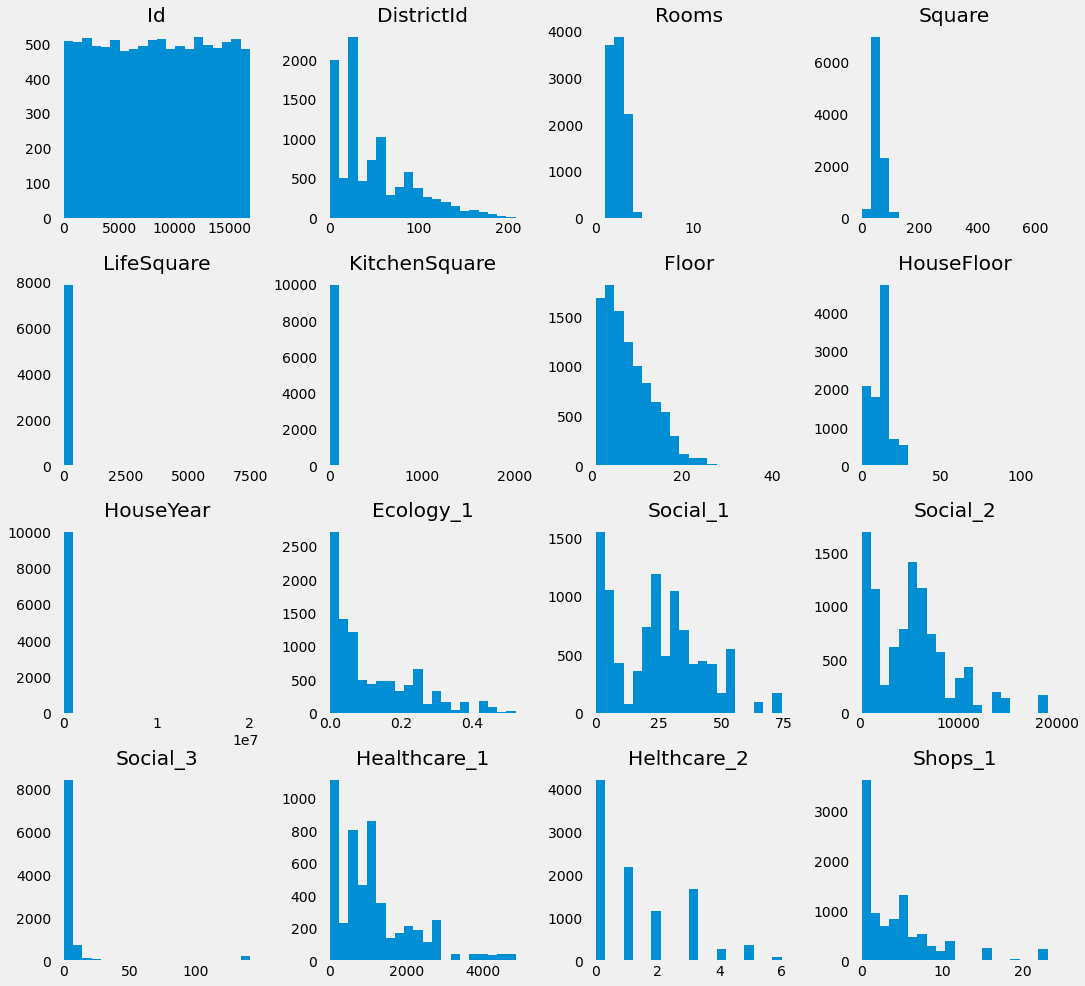

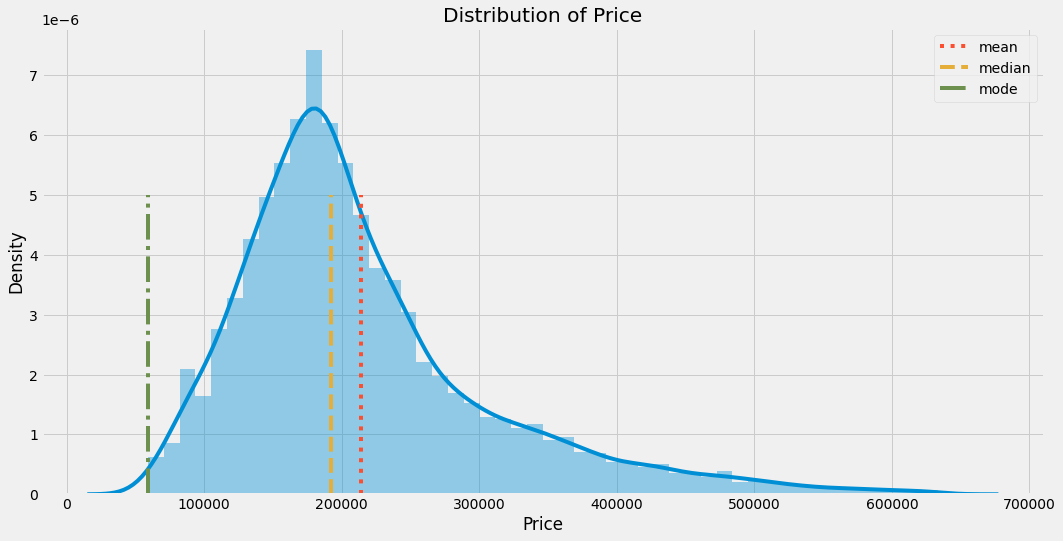

In [552]:
pipeline.plot(pipeline.train_data)

Целевая переменная вещественная, для ее предсказания используем регрессию, перед этим нормализуем и стандартизируем данные, попутно пытаемся понизить их размерность.

In [553]:
# подготовка признаков
pipeline.transform()
# масштабированный и нормализованный набор
df = DataFrame(pd.concat([pipeline.sc_train_data, pipeline.train_data[pipeline.target]], axis=1))

train resize
['Rooms', 'Square'] -> component_1 var:[0.88669833]
['Social_1', 'Social_2'] -> component_2 var:[0.94198465]
['HouseCountByDistrict', 'HeightByDistrict'] -> component_3 var:[0.98596368]
test resize
['Rooms', 'Square'] -> component_1 var:[0.88488028]
['Social_1', 'Social_2'] -> component_2 var:[0.94139093]
['HouseCountByDistrict', 'HeightByDistrict'] -> component_3 var:[0.98718295]


In [554]:
df.sample(5)

LifeSquare  KitchenSquare     Floor  HouseFloor  HouseYear  Ecology_1  \
2449    0.600234      -1.219789  2.386156    1.935682   1.763071   1.103663   
9981   -0.090708       0.622554  0.345241   -0.080492  -0.440038  -1.009373   
377     0.230786       1.148937  2.794339    1.470411   0.936905  -0.220864   
8645    0.549604       0.622554  0.753424    0.229689   0.551361   0.893358   
6723   -1.071021       0.359362  0.345241    0.539869   0.606439   0.888437   

      Healthcare_1   Shops_1  RoomsByDistrict  EcologyByDistrict  \
2449      0.660468 -1.084587         0.076967          -0.401722   
9981     -0.106347 -0.111514         0.593816          -0.840948   
377      -0.574104 -0.111514        -0.310669          -0.255298   
8645     -0.699350  0.212843         1.799795           1.599974   
6723      2.986472  1.185916        -0.655234          -0.497811   

      ShopsByDistrict  RoomsSquareByDistrict  SocialByDistrict  \
2449        -1.219583               0.907607          2.150067   
9981         0.909901              -1.448669          0.017653   
377         -0.251636              -0.706795          0.829581   
8645         0.855560              -0.543170          0.526263   
6723        -0.815423              -1.502954         -0.250580   

      SquareAvgPriceByDistrict  YearPriceByDistrict  RoomsPriceByDistrict  \
2449                 -0.908746            -0.081941             -1.214325   
9981                  0.278467             0.637729              0.492088   
377                   0.661131             1.089153              2.031409   
8645                  0.398318            -0.050616              1.568082   
6723                  0.281368            -1.459336             -0.481426   

     DistrictId Social_3 Helthcare_2 HouseYearCat DistrictSize_False  \
2449          6        0           0            5                  0   
9981         77        1           1            2                  1   
377          57        2           5            4                  0   
8645          8        3           1            3                  0   
6723        130        6           4            3                  1   

     DistrictSize_True Ecology_2_A Ecology_2_B Ecology_3_A Ecology_3_B  \
2449                 1           0           1           0           1   
9981                 0           0           1           0           1   
377                  1           0           1           0           1   
8645                 1           0           1           0           1   
6723                 0           0           1           0           1   

     Shops_2_A Shops_2_B  component_1  component_2  component_3     Price  
2449         0         1    -1.358742    -1.498166     1.707072  130000.0  
9981         0         1     0.053775     1.892321    -1.062556  240000.0  
377          0         1     0.299312     2.023832    -0.697852  310000.0  
8645         0         1     2.048137     0.458684    -0.520956  140000.0  
6723         1         0    -2.079278    -0.275284    -1.128296  110000.0

Визуализация признаков и целевой переменной после нормализации и стандортизации.

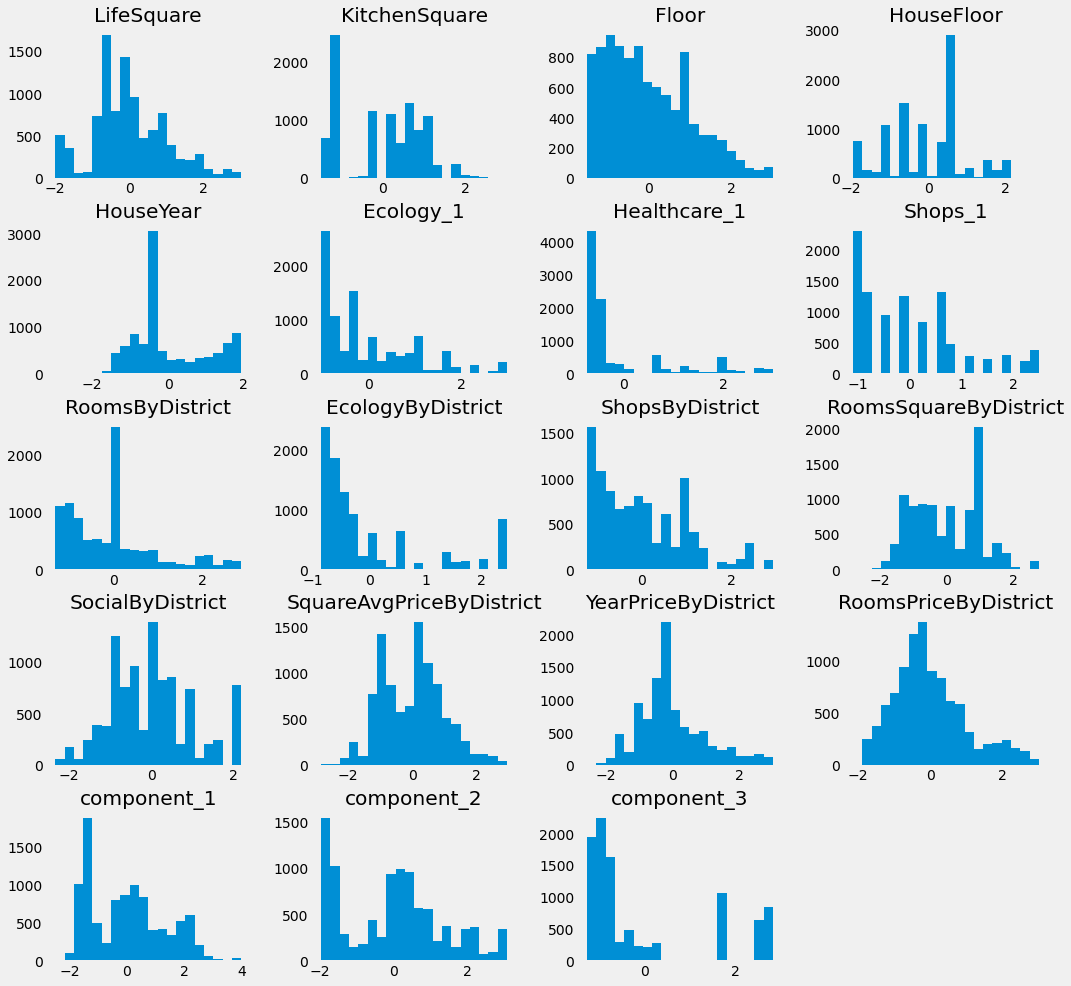

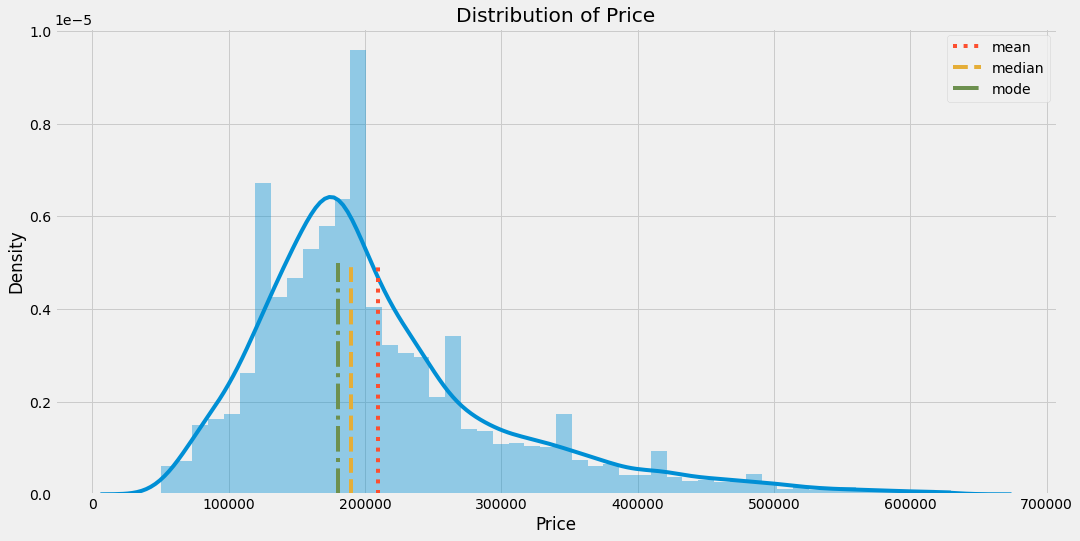

In [555]:
# распределение количественных признаков в исходных данных 
# целевой переменной и ее статистические данные
pipeline.plot(df)

После обработки количественные признаки приняли соразмерный формат выбросы в них подавлены.

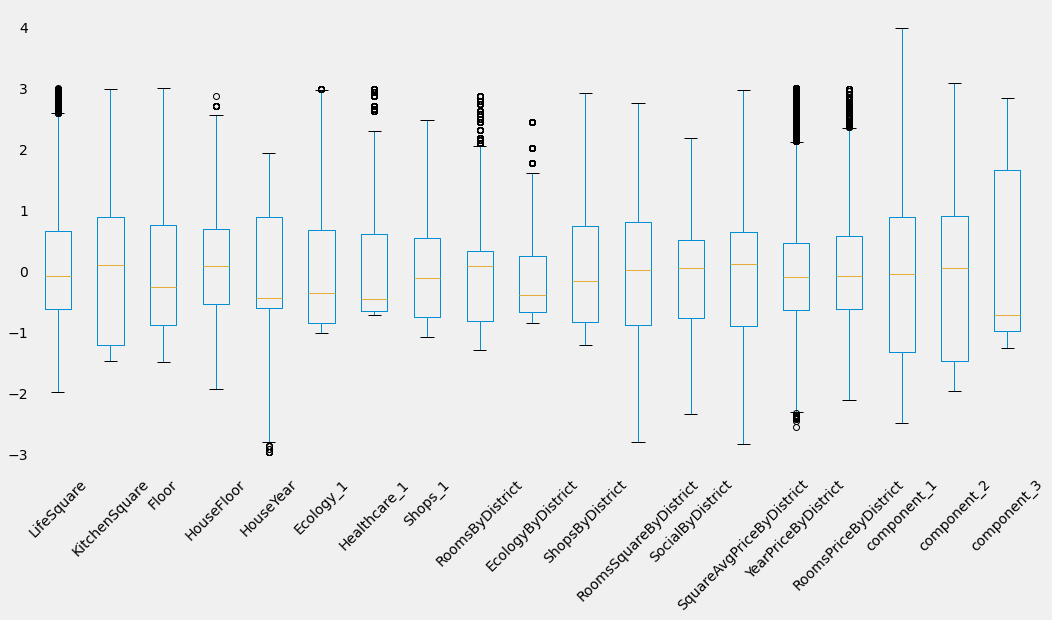

In [556]:
# визуализация выбросов после обработки признаков
pipeline.boxplot(pipeline.sc_train_data)

Корреляционная матрица позволит убедиться в устранении взаимокрреляции признаков, уровень которой устанволен при инициализации объекта класса в свойстве corr.

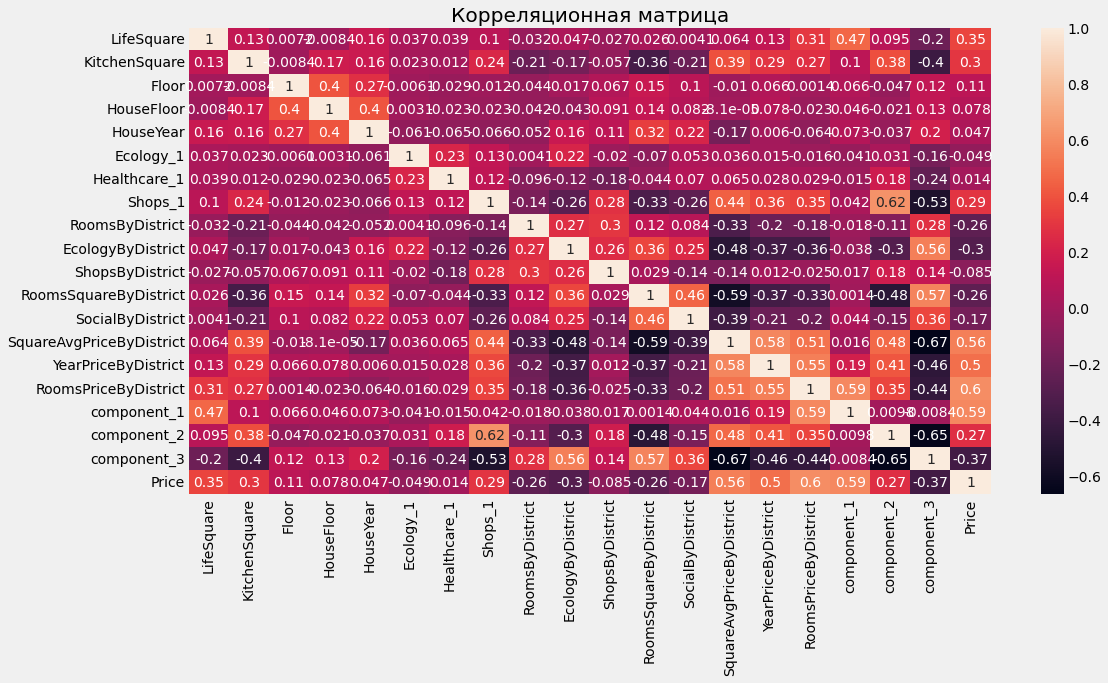

In [557]:
# корреляция признаков с целевой переменной их сильные взаимокорреляции устранены PCA
pipeline.corrplot(df)

Выполнение обучения модели и предсказание целевой переменной. Оценка качества обучения демонстрирует не плохие результаты, но как видно из анализа признаков модели, они были достигнуты благодоря target кодированию, что не позволяет говорить об устойчивости модели при предсказании на случайной выборке данных.

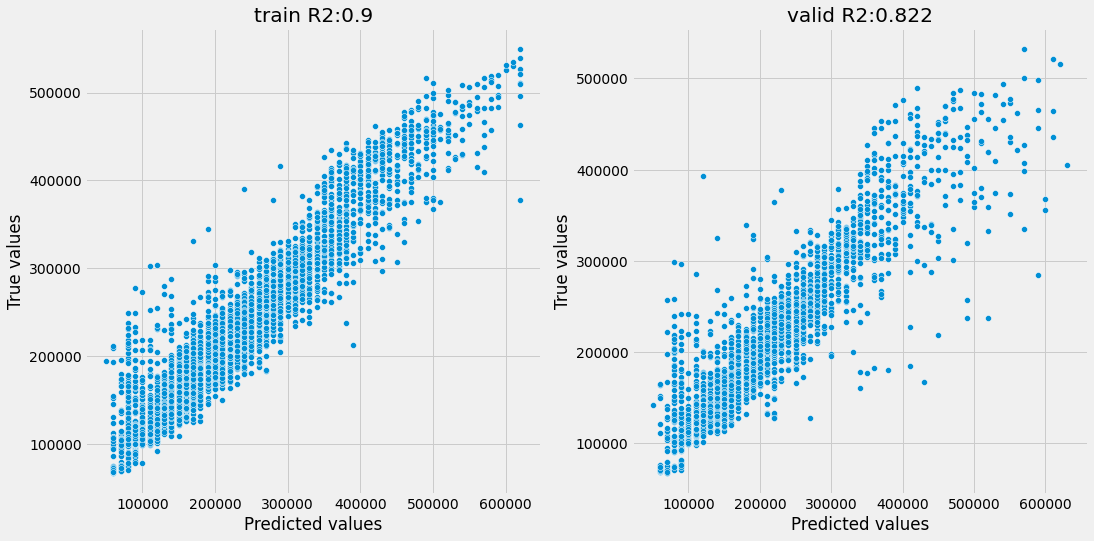

Wall time: 1.14 s


name     value
14       YearPriceByDistrict  0.222744
15      RoomsPriceByDistrict  0.208760
28               component_1  0.184903
13  SquareAvgPriceByDistrict  0.120128
0                 LifeSquare  0.073099
30               component_3  0.034687
29               component_2  0.022496
8            RoomsByDistrict  0.016991
1              KitchenSquare  0.015656
4                  HouseYear  0.010767
17                  Social_3  0.010765
9          EcologyByDistrict  0.009269
6               Healthcare_1  0.009049
3                 HouseFloor  0.008018
16                DistrictId  0.007469
11     RoomsSquareByDistrict  0.006808
2                      Floor  0.006152
21         DistrictSize_True  0.005980
10           ShopsByDistrict  0.005816
5                  Ecology_1  0.004555
12          SocialByDistrict  0.004504
7                    Shops_1  0.003223
19              HouseYearCat  0.002990
18               Helthcare_2  0.002341
20        DistrictSize_False  0.001658
25               Ecology_3_B  0.000335
27                 Shops_2_B  0.000269
24               Ecology_3_A  0.000263
26                 Shops_2_A  0.000201
22               Ecology_2_A  0.000059
23               Ecology_2_B  0.000045

In [558]:
%%time
# определение оптимальных гипрепараметров модели
#params = pipeline.search_param(pipeline.train_data)

#print(params)

params = {'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': 9, 'n_estimators': 90, 'random_state': 42}
# обучение модели
model = pipeline.fit(RandomForestRegressor(**params), df)
# оценка результата обучения
pipeline.scatterplot(model, df)
# влияние признаков на процесс обучения
pipeline.importances(model, df)

Предсказание цены квартиры на тестовом наборе

In [559]:
# предсказание целевой переменой в test
pd.concat([pipeline.test_data, pd.DataFrame(data = pipeline.predict(model, pipeline.sc_test_data),\
                                            columns = [pipeline.target])], axis=1)   

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0            58    2.0  49.882643   33.432782            6.0      6   
1            74    2.0  69.263183         NaN            1.0      6   
2           190    1.0  13.597819   15.948246           12.0      2   
3            47    2.0  73.046609   51.940842            9.0     22   
4            27    1.0  47.527111   43.387569            1.0     17   
...         ...    ...        ...         ...            ...    ...   
4995         11    3.0  67.133911   50.809797            6.0      5   
4996          1    1.0  40.198472   21.807061           10.0     12   
4997         12    3.0  77.842178   48.282625            9.0     23   
4998         62    2.0  81.305222         NaN            0.0      4   
4999         30    2.0  60.555693         NaN            1.0     10   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
0           14.0       1972   0.310199         B         B        11   
1            1.0       1977   0.075779         B         B         6   
2            5.0       1909   0.000000         B         B        30   
3           22.0       2007   0.101872         B         B        23   
4           17.0       2017   0.072158         B         B         2   
...          ...        ...        ...       ...       ...       ...   
4995         9.0       1973   0.000170         B         B        36   
4996        17.0       2017   0.007122         B         B         1   
4997        22.0       1989   0.090799         B         B        74   
4998         0.0       1977   0.072158         B         B         2   
4999        17.0       1977   0.000078         B         B        22   

      Social_2 Social_3  Healthcare_1 Helthcare_2  Shops_1 Shops_2  \
0         2748        1           NaN           0        0       B   
1         1437        3           NaN           0        2       B   
2         7538       87        4702.0           5        5       B   
3         4583        3           NaN           3        3       B   
4          629        1           NaN           0        0       A   
...        ...      ...           ...         ...      ...     ...   
4995      5992        0           NaN           1        1       B   
4996       264        0           NaN           0        1       B   
4997     19083        2           NaN           5       15       B   
4998       629        1           NaN           0        0       A   
4999      6398      141        1046.0           3       23       B   

              Price  
0     208530.845687  
1     232473.355845  
2     156448.612993  
3     299506.056947  
4     124537.204085  
...             ...  
4995  244117.454106  
4996  137101.692748  
4997  298158.729120  
4998  179258.420078  
4999  166579.305883  

[5000 rows x 19 columns]